In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
df = pd.read_csv('agaricus-lepiota.data')
df
#Read data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
#All of the data came in with single letters as the notation, making it difficult to understand. This helps to make
#it more readable on a graph.
df['poison'] = df['p'].replace(['e','p'],['Edible','Poisonous'])

df['odor'] = df['p.1'].replace(['a','l','c','y','f','m','n','p','s'],['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])

df['spore-print-color'] = df['k.1'].replace(['k','n','b','h','r','o','u','w','y'],['black','brown','buff','chocolate','green','orange','purple','white','yellow'])

In [3]:
df #Checking to ensure the above code works

,p,x,s,n,t,p.1,f,c,n.1,k,...,p.2,w.2,o,p.3,k.1,s.3,u,poison,odor,spore-print-color
0,e,x,s,y,t,a,f,c,b,k,...,p,w,o,p,n,n,g,Edible,almond,brown
1,e,b,s,w,t,l,f,c,b,n,...,p,w,o,p,n,n,m,Edible,anise,brown
2,p,x,y,w,t,p,f,c,n,n,...,p,w,o,p,k,s,u,Poisonous,pungent,black
3,e,x,s,g,f,n,f,w,b,k,...,p,w,o,e,n,a,g,Edible,none,brown
4,e,x,y,y,t,a,f,c,b,n,...,p,w,o,p,k,n,g,Edible,almond,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,p,o,o,p,b,c,l,Edible,none,buff
8119,e,x,s,n,f,n,a,c,b,y,...,p,n,o,p,b,v,l,Edible,none,buff
8120,e,f,s,n,f,n,a,c,b,n,...,p,o,o,p,b,c,l,Edible,none,buff
8121,p,k,y,n,f,y,f,c,n,b,...,p,w,o,e,w,v,l,Poisonous,fishy,white


In [4]:
#Creating a table to graph
df_odor = df[['poison','odor']]
df_odor

,poison,odor
0,Edible,almond
1,Edible,anise
2,Poisonous,pungent
3,Edible,none
4,Edible,almond
...,...,...
8118,Edible,none
8119,Edible,none
8120,Edible,none
8121,Poisonous,fishy


In [5]:
#Grouping for graph
grp_odor = df_odor.groupby(['odor','poison']).size().unstack(level=0, fill_value=0)
grp_odor

odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy
poison,,,,,,,,,
Edible,400,400,0,0,0,0,3408,0,0
Poisonous,0,0,192,576,2160,36,120,255,576


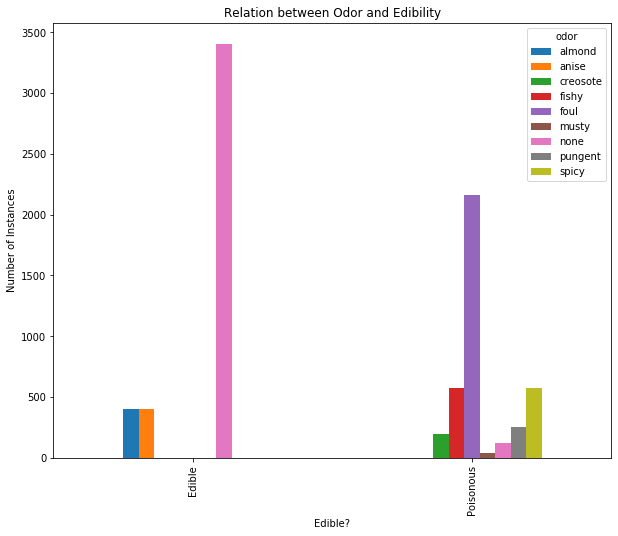

In [6]:
grp_odor.plot(kind='bar', figsize=(10, 8))

plt.xlabel('Edible?') # Add to x-label to the plot
plt.ylabel('Number of Instances') # Add y-label to the plot
plt.title('Relation between Odor and Edibility') # Add title to the plot

plt.show()
#Plot vertical bar chart

In [7]:
grp_odor.drop(columns=['almond','anise','creosote','fishy','foul','musty','pungent','spicy'], inplace=True)

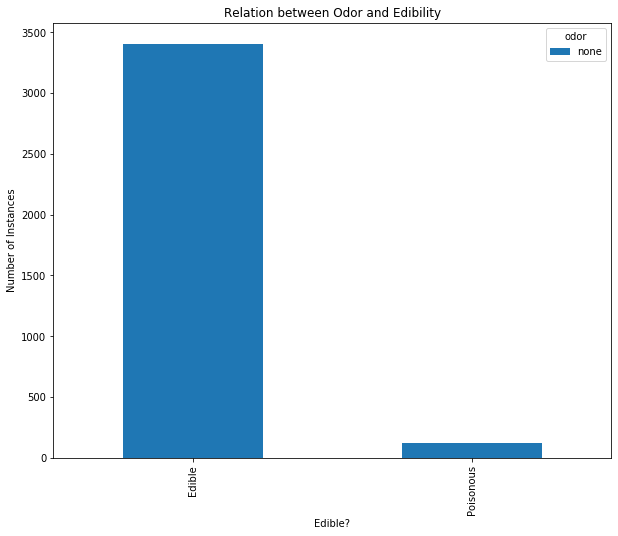

In [8]:
grp_odor.plot(kind='bar', figsize=(10, 8))

plt.xlabel('Edible?') # Add to x-label to the plot
plt.ylabel('Number of Instances') # Add y-label to the plot
plt.title('Relation between Odor and Edibility') # Add title to the plot

plt.show()
#Plot vertical bar chart

In [9]:
#Creating a table to graph
df_spore = df[['poison','spore-print-color']]
df_spore

,poison,spore-print-color
0,Edible,brown
1,Edible,brown
2,Poisonous,black
3,Edible,brown
4,Edible,black
...,...,...
8118,Edible,buff
8119,Edible,buff
8120,Edible,buff
8121,Poisonous,white


In [10]:
#Grouping for graph
grp_spore = df_spore.groupby(['spore-print-color','poison']).size().unstack(level=0, fill_value=0)
grp_spore

spore-print-color,black,brown,buff,chocolate,green,orange,purple,white,yellow
poison,,,,,,,,,
Edible,1648,1744,48,48,0,48,48,576,48
Poisonous,223,224,0,1584,72,0,0,1812,0


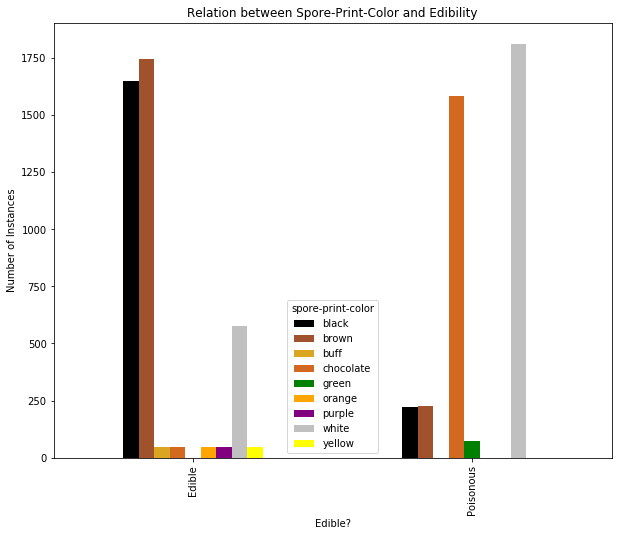

In [22]:
grp_spore.plot(kind='bar', figsize=(10, 8),color=['black', 'sienna', 'goldenrod', 'chocolate', 'green','orange','purple','silver','yellow'])

plt.xlabel('Edible?') # Add to x-label to the plot
plt.ylabel('Number of Instances') # Add y-label to the plot
plt.title('Relation between Spore-Print-Color and Edibility') # Add title to the plot

plt.show()
#Plot vertical bar chart

In [ ]:
#There is not any continuous visualization in this notebook due to the lack of encoding mechanism. Please see the
#bottom of the other notebook for that code.